importing Jupyter notebook from apis.ipynb
        balance          item  normalized                   period
0  5.079438e+09  Crypto-Loans    0.542017  2022-01-15 00:00:00.000
1  1.361133e+09  Crypto-Loans    0.260867  2023-01-15 00:00:00.000
2  9.352618e+08  Crypto-Loans    1.000000  2020-10-24 00:00:00.000
3  9.486405e+08  Crypto-Loans    1.000000  2020-11-03 00:00:00.000
4  1.899016e+09  Crypto-Loans    0.360384  2023-11-15 00:00:00.000


<string>:17: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.


1419109797 1543.54 918470.747171123
<Response [200]>
89.62
<Response [200]>
<Response [200]>
                    date        price  daily_returns
1    2020-10-07 00:00:00   519.617136      -0.079605
2    2020-10-08 00:00:00   522.132005       0.004840
3    2020-10-09 00:00:00   530.376130       0.015789
4    2020-10-10 00:00:00   566.915563       0.068893
5    2020-10-11 00:00:00   586.876527       0.035210
...                  ...          ...            ...
1148 2023-11-28 00:00:00  1477.977292      -0.006342
1149 2023-11-29 00:00:00  1485.742908       0.005254
1150 2023-11-30 00:00:00  1519.720468       0.022869
1151 2023-12-01 00:00:00  1526.450800       0.004429
1152 2023-12-01 15:56:30  1540.561256       0.009244

[1152 rows x 3 columns]
    collateral  collateral_rank   period       revenues
0        ETH-C                3  2023-12   17703.413398
1        ETH-B                4  2023-12    1534.144277
2       Others               99  2023-12   68432.265194
3        ETH-A        

<string>:11: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.


importing Jupyter notebook from formulas.ipynb
['Crypto-Loans' 'Real-World Assets' 'Stablecoins' 'Others assets' 'DSR'
 'DAI' 'Equity']
5343784443.948217 -5285590883.507172 -58193560.441039376
24.361739105564755
70.65020010319068
21.84763804979359
1.1000321098354844
0.011979297769634295
90.82776244396376
0.9891100471863251
['Crypto-Loans' 'Real-World Assets' 'Stablecoins' 'Others assets' 'DSR'
 'DAI' 'Equity']
0.5149470073600555
0.472878219839139
10.482986294798858
-2563791675.9155617


<string>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
<string>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
<string>:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
<string>:3: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
<string>

0.7488138572289903
date
2020    3.867950
2021    1.504522
2022   -0.801020
2023    0.643278
dtype: float64
R^2: 0.1683927922248467


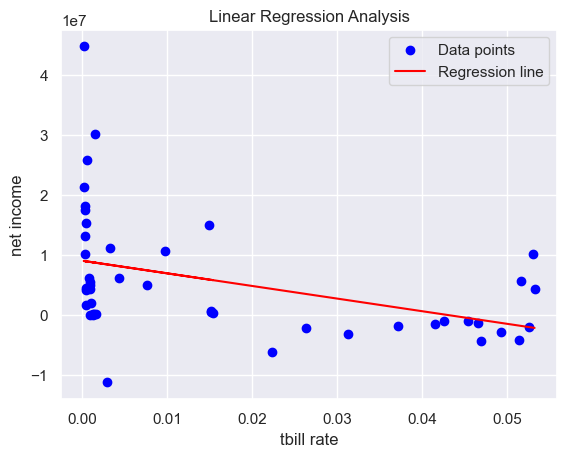

-0.4103569083430261
The CAGR is 4.08%
-0.012587805022984726
1.0156466918521445 0.04397407716669234
{'ETH-A': 0.0525, 'ETH-B': 0.0575, 'ETH-C': 0.05, 'WSTETH-A': 0.0525, 'WBTC-A': 0.0586, 'Others': 0.04009999999999999}
Weighted Average Stability Fee: 0.05202577283342917
0.21656769575709248
market value of equity: 1419109797
market value of debt: 5285590883.507172
value of financing: 6704700680.507172
cost of equity: 1.0156466918521445
cost of debt: 0.002025772833429168
proportion of debt financing: 78.83410662722304
proportion of equity financing: 21.165893372776974
wacc: 0.21656769575709248
R^2: 0.040565978121079094
R^2: 0.39295073109537093


<string>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.


In [1]:
import pandas as pd
import requests
import numpy as np
import seaborn as sns
import yfinance as yf
import import_ipynb
sns.set_theme()
# Set the float display format to suppress scientific notation
#pd.set_option('display.float_format', lambda x: '%.3f' % x)

import apis
import makerdao
import formulas

In [18]:
sp500 = yf.Ticker("^GSPC")
sp500_history = sp500.history(period='5yr', interval='1d')



In [20]:
# Reindexing to include all calendar days
all_days = pd.date_range(start=sp500_history.index.min(), end=sp500_history.index.max(), freq='D')
sp500_history = sp500_history.reindex(all_days)

# Forward fill missing data
sp500_history.ffill(inplace=True)

# Display the last 10 rows
sp500_history.tail()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
2023-12-01 00:00:00-05:00,4559.430176,4580.580078,4554.709961,4577.080078,799418772,0.0,0.0


In [10]:
filtered_sp500_history = sp500_history[(sp500_history.index >= "2020-10-06") & (sp500_history.index < "2023-12-01")]

filtered_sp500_history['daily returns'] = filtered_sp500_history['Close'].pct_change()

filtered_sp500_history

C:\Users\brand\AppData\Local\Temp\ipykernel_19760\1459594110.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_sp500_history['daily returns'] = filtered_sp500_history['Close'].pct_change()


,Open,High,Low,Close,Volume,Dividends,Stock Splits,daily returns
Date,,,,,,,,
2020-10-06 00:00:00-04:00,3408.739990,3431.560059,3354.540039,3360.969971,4453390000,0.0,0.0,NaN
2020-10-07 00:00:00-04:00,3384.560059,3426.260010,3384.560059,3419.439941,3814750000,0.0,0.0,0.017397
2020-10-08 00:00:00-04:00,3434.280029,3447.280029,3428.149902,3446.830078,3867640000,0.0,0.0,0.008010
2020-10-09 00:00:00-04:00,3459.669922,3482.340088,3458.070068,3477.139893,3944090000,0.0,0.0,0.008794
2020-10-12 00:00:00-04:00,3500.020020,3549.850098,3499.610107,3534.219971,3435760000,0.0,0.0,0.016416
...,...,...,...,...,...,...,...,...
2023-11-24 00:00:00-05:00,4555.839844,4560.310059,4552.799805,4559.339844,1639500000,0.0,0.0,0.000597
2023-11-27 00:00:00-05:00,4554.859863,4560.520020,4546.319824,4550.430176,3403990000,0.0,0.0,-0.001954
2023-11-28 00:00:00-05:00,4545.549805,4568.140137,4540.509766,4554.890137,3586240000,0.0,0.0,0.000980


In [41]:
from makerdao import mkr_history
mkr_history = mkr_history.rename(columns={'daily_returns':'mkr_daily_returns'})
mkr_history

,price,mkr_daily_returns
date,,
2020-10-07 00:00:00,519.617136,-0.079605
2020-10-08 00:00:00,522.132005,0.004840
2020-10-09 00:00:00,530.376130,0.015789
2020-10-10 00:00:00,566.915563,0.068893
2020-10-11 00:00:00,586.876527,0.035210
...,...,...
2023-11-28 00:00:00,1477.977292,-0.006342
2023-11-29 00:00:00,1485.742908,0.005254
2023-11-30 00:00:00,1519.720468,0.022869


In [42]:
import pandas as pd

"""
# Convert 'date' to datetime if it's not already, and set as index for mkr_history
mkr_history['date'] = pd.to_datetime(mkr_history['date']).dt.tz_localize(None)
mkr_history.set_index('date', inplace=True)
"""

# If filtered_sp500_history has the date in the index, ensure it's in datetime format and remove timezone
filtered_sp500_history.index = pd.to_datetime(filtered_sp500_history.index).tz_localize(None)
# Merge the DataFrames on their indices
combined_data = mkr_history.merge(filtered_sp500_history, left_index=True, right_index=True, how='inner')

combined_data

,price,mkr_daily_returns,Open,High,Low,Close,Volume,Dividends,Stock Splits,daily returns
2020-10-07,519.617136,-0.079605,3384.560059,3426.260010,3384.560059,3419.439941,3814750000,0.0,0.0,0.017397
2020-10-08,522.132005,0.004840,3434.280029,3447.280029,3428.149902,3446.830078,3867640000,0.0,0.0,0.008010
2020-10-09,530.376130,0.015789,3459.669922,3482.340088,3458.070068,3477.139893,3944090000,0.0,0.0,0.008794
2020-10-12,589.322284,0.004167,3500.020020,3549.850098,3499.610107,3534.219971,3435760000,0.0,0.0,0.016416
2020-10-13,591.480227,0.003662,3534.010010,3534.010010,3500.860107,3511.929932,3611100000,0.0,0.0,-0.006307
...,...,...,...,...,...,...,...,...,...,...
2023-11-24,1471.550972,0.003106,4555.839844,4560.310059,4552.799805,4559.339844,1639500000,0.0,0.0,0.000597
2023-11-27,1487.410626,0.021289,4554.859863,4560.520020,4546.319824,4550.430176,3403990000,0.0,0.0,-0.001954
2023-11-28,1477.977292,-0.006342,4545.549805,4568.140137,4540.509766,4554.890137,3586240000,0.0,0.0,0.000980
2023-11-29,1485.742908,0.005254,4571.839844,4587.640137,4547.149902,4550.580078,4418760000,0.0,0.0,-0.000946


In [34]:
combined_data['daily returns'].describe()

count    793.000000
mean       0.000449
std        0.011114
min       -0.043237
25%       -0.005834
50%        0.000317
75%        0.007145
max        0.055434
Name: daily returns, dtype: float64

In [32]:
from sklearn.linear_model import LinearRegression

X = combined_data['daily returns'].values.reshape(-1, 1)
Y = combined_data['mkr_daily_returns'].values

model = LinearRegression()
model.fit(X, Y)

beta = model.coef_[0]
print(beta)

0.1648691351796405


In [44]:
import statsmodels.api as sm

# Assuming 'combined_data' is your DataFrame with 'daily returns' and 'daily_returns'

# Define the independent variable (benchmark returns) and add a constant to the model
X = combined_data['daily returns']
X = sm.add_constant(X)  # Adding a constant for the intercept

# Define the dependent variable (asset returns)
Y = combined_data['mkr_daily_returns']

# Perform the regression
model = sm.OLS(Y, X).fit()

# Get the beta value and its statistics
beta = model.params[1]
p_value = model.pvalues[1]
confidence_interval = model.conf_int()[1]

# Print the results
print(f"Beta: {beta}")
print(f"P-value: {p_value}")
print(f"95% Confidence Interval: {confidence_interval}")


Beta: 0.16486913517964052
P-value: 0.3737317738102496
95% Confidence Interval: const            0.005281
daily returns    0.528498
Name: 1, dtype: float64
